# AIMedic - Homework 2

Name: `Mahsa Amani`

Email: `mahsa.ama1391@gmail.com`

---

## Import requirements for load and visualization

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
import cv2

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load data

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


## Preprocessing



1.   Shuffle
2.   Visualisation
3.   Resize
4.   Uniform distribution
5.   NAN data
6.   Normalization
7.   One-hot encoding
8.   batching
9.   Flattening




### Shuffle data

This helps the training converges fast and also prevents any bias during the training.


In [5]:
def unison_shuffle(a, b):
    inx = np.random.permutation(a.shape[0])
    return a[inx], b[inx]

In [6]:
X_train, y_train = unison_shuffle(X_train, y_train)

### Visualize data

This is important to understand how data is and with this data can be analyzed easily.

In [7]:
# shape
print(f'Shape of training data is {X_train.shape} and shape of their labels is {y_train.shape}')
print(f'Shape of test data is {X_test.shape} and shape of their labels is {y_test.shape}')

Shape of training data is (50000, 32, 32, 3) and shape of their labels is (50000, 1)
Shape of test data is (10000, 32, 32, 3) and shape of their labels is (10000, 1)


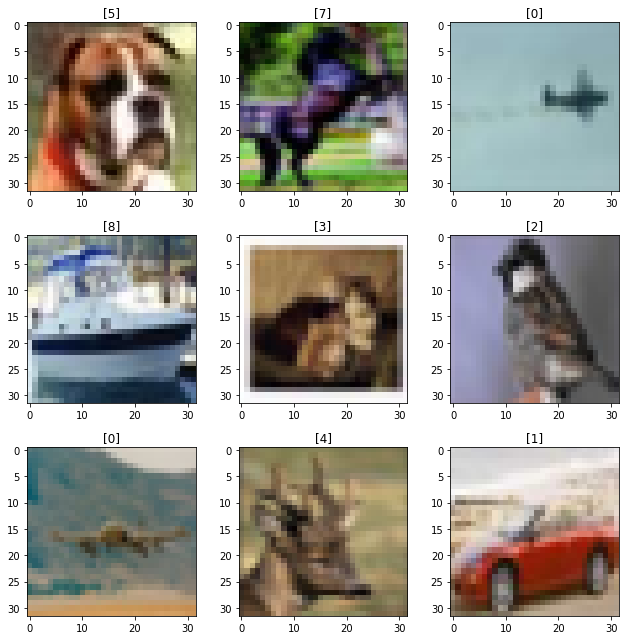

In [8]:
# images
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])
plt.tight_layout()

Data have been blurred in denoising operation previously, so we don't need to do that again. This operation will reduce the size of data and speed up the training.

### Resize data

Resizing will reduce the size of data and speed up the training and prevent overfitting.

In [9]:
new_width = 16
new_height = 16
X_train = np.array([cv2.resize(img, (new_height, new_width)) for img in X_train])
X_test  = np.array([cv2.resize(img, (new_height, new_width)) for img in X_test])

In [10]:
# shape
print(f'Shape of training data is {X_train.shape} and shape of their labels is {y_train.shape}')
print(f'Shape of test data is {X_test.shape} and shape of their labels is {y_test.shape}')

Shape of training data is (50000, 16, 16, 3) and shape of their labels is (50000, 1)
Shape of test data is (10000, 16, 16, 3) and shape of their labels is (10000, 1)


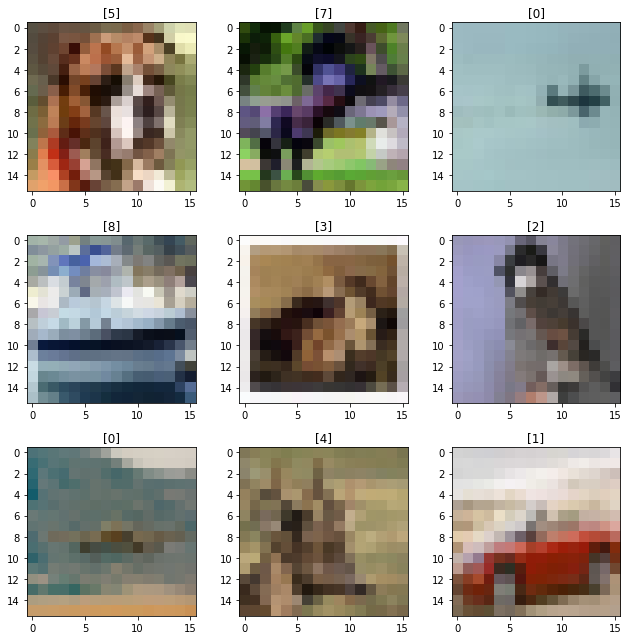

In [12]:
# images to see the effect of resizing
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])
plt.tight_layout()

### Uniformity check

With this we will make sure that the data is balanced and it doesn't need oversampling or undersampling.

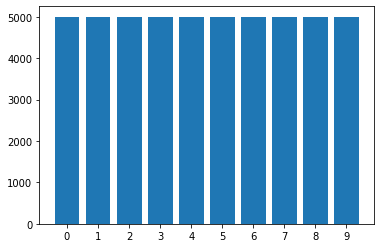

In [13]:
labels = []
count_labels = []
for i in range(10):
    labels.append(i)
    count_labels.append((y_train == i).sum())
plt.bar(labels, count_labels)
plt.xticks(range(10))
plt.show()

There is no need to sampling or undersampling because from each category there is exactly 5000 samples.

### NAN check

NANs are missing data or errors and they are useless, so we should remove them. 

In [14]:
print(f'Number of NAN labels: {y_train.shape[0] - np.count_nonzero(~np.isnan(y_train))}')

Number of NAN labels: 0


There isn't any missing data(NAN) in our labels, so we don't need to remove any data. It has done before.

But we need to **normalize** training data(X) and change labels from integer to **categorical data**.

### Data Normalization

By normalizing data, we can scale it and minimize it and save memory.

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### One-hot Encoding

It changes the data representation and makes it easy to work with data and fit it to our model. For instance, label 3 will become an array which all of its elements is 0, except the third element that is 1.

In [17]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [18]:
# shape after one-hot encoding
print(f'Shape of training data is {X_train.shape} and shape of their labels is {Y_train.shape}')
print(f'Shape of test data is {X_test.shape} and shape of their labels is {Y_test.shape}')

Shape of training data is (50000, 16, 16, 3) and shape of their labels is (50000, 10)
Shape of test data is (10000, 16, 16, 3) and shape of their labels is (10000, 10)


### Batching

To speed up the learning hyperparameters we split our trainging data into 5 batches and use one batch for this purpose. Also, in order to represent the whole data with this batch, this batch is collected in a way that from each label we have the same amount.

In [19]:
# use a batch of training data(with 10000 data) for finding the best parameters
batch_size = int(X_train.shape[0] / 5)
no_labels = 10
label_size = int(batch_size / no_labels)
learning_X = []
learning_y = []
label_counter = {i:0 for i in range(no_labels)}
for idx in range(X_train.shape[0]):
    for i in range(no_labels):
        if label_counter[i] == label_size:
            if i == no_labels - 1:
                break
    if label_counter[y_train.item(idx)] < label_size:
        learning_X.append(X_train[idx])
        learning_y.append(y_train[idx])
        label_counter[y_train.item(idx)] += 1

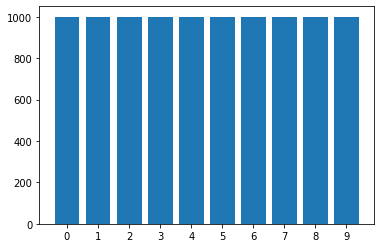

In [20]:
# data of each class in learning batch
labels = []
count_labels = []
for i in range(10):
    labels.append(i)
    count_labels.append(learning_y.count(i))
plt.bar(labels, count_labels)
plt.xticks(range(10))
plt.show()

In [22]:
# X and y to nparray
learning_X = np.array(learning_X)
learning_y = np.array(learning_y)

# one_hot y
learning_Y = to_categorical(learning_y)

### Flattening

Because the model will be MLP, we have to flatten the data to a n*1 array that we can input it to our model. (If we use convolutional layers, this will axtract features and then flatten it and the result will be much better.)

In [23]:
# flatten X to a vector
learning_X = learning_X.reshape(learning_X.shape[0], 16*16*3)
X_train = X_train.reshape(X_train.shape[0], 16*16*3)
X_test = X_test.reshape(X_test.shape[0], 16*16*3)

## Static vs. Dynamic methods

* **Dynamic models** are used when we data is continually entering the 
system and we're incorporating that data into the model through continuous updates.

* **Static models** are used when we want to train the model exactly once and then use that trained model for a while.

k-fold method takes k-times more than train-test-split. On the other hand, in k-fold we use all the data in training. So because our data doesn't change over time and we have a large size of data that may take too much time for learning, it is better to use `static methods` and split our data into training, validation, and test set.

## Import requirements for defining parameters and training

In [24]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
import time

## Hyperparameters

During this we have defined the probable features to be checked and then we have continued with the best one. For each parameter the best result, loss, and accuracy have been shown and plotted.

In [57]:
# parameters to be checked
layer_size = range(50, 500, 50)
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']
optimizers = [SGD, Adadelta, Adagrad, Adam, RMSprop]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
no_layers = range(1, 10)
no_epoch = range(20, 100, 10)
batch_size = [2**i for i in range(5, 13)] 

### Change number of nourons

In [26]:
# the best result
best_layer_size = layer_size[0]
best_loss = 5
best_acc = 0

# different losses and accuracies for each change in parameter(layer size in here)
losses = []
accs = []

# a loop on different size of layers
for i in layer_size:
    print("Layer size:", i)
    # model building
    model = Sequential()
    model.add(Dense(i, activation='relu', input_dim=16*16*3))
    model.add(Dense(no_labels, activation='softmax'))
    # model compiling
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['acc'])
    # fitting model to our training data(a batch of it)
    history = model.fit(learning_X, learning_Y, epochs=30)
    # save the result
    losses.append(history.history['loss'][-1])
    accs.append(history.history['acc'][-1])
    # save the best result
    if history.history['loss'][-1] <= best_loss and history.history['acc'][-1] >= best_acc:
        best_layer_size = i
        best_loss = history.history['loss'][-1]
        best_acc = history.history['acc'][-1]
    print("-----------------------------------------------------------")

Layer size: 50
Epoch 1/30
313/313 [==============================] - 15s 2ms/step - loss: 2.2175 - acc: 0.1873
Epoch 2/30
313/313 [==============================] - 1s 2ms/step - loss: 1.9588 - acc: 0.2903
Epoch 3/30
313/313 [==============================] - 1s 2ms/step - loss: 1.9051 - acc: 0.3187
Epoch 4/30
313/313 [==============================] - 1s 2ms/step - loss: 1.8578 - acc: 0.3319
Epoch 5/30
313/313 [==============================] - 1s 2ms/step - loss: 1.8256 - acc: 0.3447
Epoch 6/30
313/313 [==============================] - 1s 2ms/step - loss: 1.8091 - acc: 0.3516
Epoch 7/30
313/313 [==============================] - 1s 2ms/step - loss: 1.7754 - acc: 0.3640
Epoch 8/30
313/313 [==============================] - 1s 2ms/step - loss: 1.7475 - acc: 0.3718
Epoch 9/30
313/313 [==============================] - 1s 2ms/step - loss: 1.7385 - acc: 0.3809
Epoch 10/30
313/313 [==============================] - 1s 2ms/step - loss: 1.7274 - acc: 0.3785
Epoch 11/30
313/313 [============

In [27]:
best_layer_size, best_loss, best_acc

(350, 1.1810764074325562, 0.583899974822998)

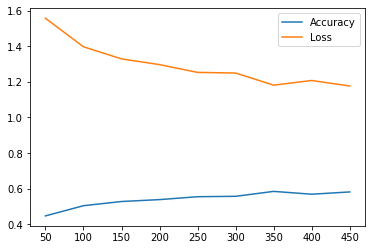

In [28]:
plt.plot(layer_size, accs, label='Accuracy')
plt.plot(layer_size, losses, label='Loss')
plt.legend()
plt.show()

With increasing the size of layer, accuracy will increace and loss will decrease, but after 350 the results will not change too much.

### Change activation function

In [29]:
best_activation_function = activation_functions[0]
best_time = 10000000
best_acc = 0
best_loss = 5

times = []
accs = []
losses = []

for i in activation_functions:
    print("Activation function:", i)
    start_time = time.time()
    model = Sequential()
    model.add(Dense(best_layer_size, activation=i, input_dim=16*16*3))
    model.add(Dense(no_labels, activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(learning_X, learning_Y, epochs=30)
    end_time = time.time()
    run_time = end_time - start_time

    times.append(run_time)
    accs.append(history.history['acc'][-1])
    losses.append(history.history['loss'][-1])
    
    if run_time <= best_time and history.history['acc'][-1] >= best_acc:
        best_activation_function = i
        best_time = run_time
        best_acc = history.history['acc'][-1]
    print("-----------------------------------------------------------")

Activation function: relu
Epoch 1/30
313/313 [==============================] - 2s 3ms/step - loss: 2.1643 - acc: 0.2177
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 1.8785 - acc: 0.3137
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 1.8147 - acc: 0.3486
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7425 - acc: 0.3756
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7112 - acc: 0.3872
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 1.6580 - acc: 0.4051
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 1.6260 - acc: 0.4235
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 1.6144 - acc: 0.4310
Epoch 9/30
313/313 [==============================] - 1s 3ms/step - loss: 1.5666 - acc: 0.4395
Epoch 10/30
313/313 [==============================] - 1s 3ms/step - loss: 1.5647 - acc: 0.4386
Epoch 11/30
313/313 [==

In [30]:
best_activation_function, best_time, best_acc

('relu', 32.598901987075806, 0.5705000162124634)

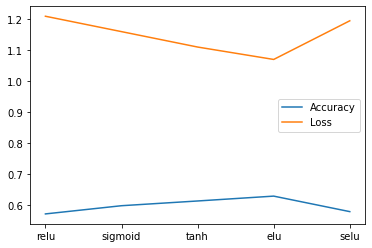

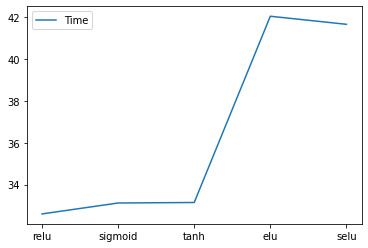

In [31]:
plt.plot(activation_functions, accs, label='Accuracy')
plt.plot(activation_functions, losses, label='Loss')
plt.legend()
plt.show()

plt.plot(activation_functions, times, label='Time')
plt.legend()
plt.show()

`elu` takes too much time but has the most accuracy and least loss.

### Change optimizer

In [41]:
best_optimizer = optimizers[0]
best_loss = 5
best_acc = 0

losses = []
accs = []

for j in optimizers:
    print("Optimizer: ", j.__name__)
    model = Sequential()
    model.add(Dense(best_layer_size, activation=best_activation_function, input_dim=16*16*3))
    model.add(Dense(no_labels, activation='softmax'))
    model.compile(optimizer=j(), loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(learning_X, learning_Y, epochs=30)
    losses.append(history.history['loss'][-1])
    accs.append(history.history['acc'][-1])
    if history.history['loss'][-1] <= best_loss and history.history['acc'][-1] >= best_acc:
        best_optimizer = j
        best_loss = history.history['loss'][-1]
        best_acc = history.history['acc'][-1]
    print("-----------------------------------------------------------")

Optimizer:  SGD
Epoch 1/30
313/313 [==============================] - 1s 3ms/step - loss: 2.1956 - acc: 0.1935
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 1.9853 - acc: 0.2956
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 1.8987 - acc: 0.3262
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 1.8535 - acc: 0.3540
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 1.8318 - acc: 0.3668
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7988 - acc: 0.3763
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7756 - acc: 0.3745
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7503 - acc: 0.3952
Epoch 9/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7249 - acc: 0.4045
Epoch 10/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7106 - acc: 0.4069
Epoch 11/30
313/313 [============

In [42]:
best_optimizer.__name__, best_loss, best_acc

('Adam', 1.2036224603652954, 0.5770999789237976)

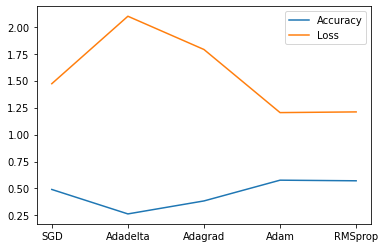

In [43]:
optimizers_name = [i.__name__ for i in optimizers]
plt.plot(optimizers_name, accs, label='Accuracy')
plt.plot(optimizers_name, losses, label='Loss')
plt.legend()
plt.show()

`Adam` and `RMSprop` are almost the same.

### Change Learning rate

In [45]:
best_learning_rate = learning_rates[0]
best_loss = 5
best_acc = 0

losses = []
accs = []

for i in learning_rates:
    print("Learning rate: ", i)
    model = Sequential()
    model.add(Dense(best_layer_size, activation=best_activation_function, input_dim=16*16*3))
    model.add(Dense(no_labels, activation='softmax'))
    model.compile(optimizer=best_optimizer(learning_rate=i), loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(learning_X, learning_Y, epochs=30)

    losses.append(history.history['loss'][-1])
    accs.append(history.history['acc'][-1])
    
    if history.history['loss'][-1] <= best_loss and history.history['acc'][-1] >= best_acc:
        best_learning_rate = i
        best_loss = history.history['loss'][-1]
        best_acc = history.history['acc'][-1]
    print("-----------------------------------------------------------")

Learning rate:  0.1
Epoch 1/30
313/313 [==============================] - 2s 4ms/step - loss: 32.9685 - acc: 0.0984
Epoch 2/30
313/313 [==============================] - 1s 4ms/step - loss: 2.3113 - acc: 0.0967
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3136 - acc: 0.0993
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3164 - acc: 0.0943
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3152 - acc: 0.1003
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3131 - acc: 0.1053
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3155 - acc: 0.0979
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3153 - acc: 0.1057
Epoch 9/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3139 - acc: 0.0970
Epoch 10/30
313/313 [==============================] - 1s 3ms/step - loss: 2.3188 - acc: 0.0948
Epoch 11/30
313/313 [=======

In [46]:
best_learning_rate, best_loss, best_acc

(0.001, 1.2274833917617798, 0.5609999895095825)

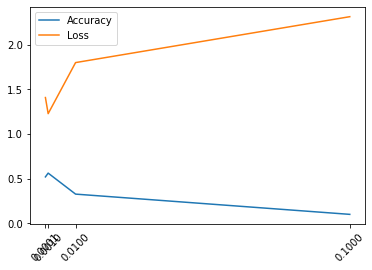

In [49]:
plt.plot(learning_rates, accs, label='Accuracy')
plt.plot(learning_rates, losses, label='Loss')
plt.xticks(learning_rates, rotation=45)
plt.legend()
plt.show()

### Change number of layers

In [51]:
best_no_of_layers = no_layers[0]
best_layers_size = []
best_loss = 5
best_acc = 0

losses = []
accs = []

for i in no_layers:
    print("Number of layers:", i)
    layers_size = []
    model = Sequential()
    model.add(Dense(best_layer_size, activation=best_activation_function, input_dim=16*16*3))

    for j in range(1, i):
        size = best_layer_size - j*35
        layers_size.append(size)
        model.add(Dense(size, activation=best_activation_function))

    model.add(Dense(no_labels, activation='softmax'))
    model.compile(optimizer=best_optimizer(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(learning_X, learning_Y, epochs=30)

    losses.append(history.history['loss'][-1])
    accs.append(history.history['acc'][-1])

    if history.history['loss'][-1] <= best_loss and history.history['acc'][-1] >= best_acc:
        best_no_of_layers = i
        best_layers_size = layers_size
        best_loss = history.history['loss'][-1]
        best_acc = history.history['acc'][-1]
    print("-----------------------------------------------------------")

Number of layers: 1
Epoch 1/30
313/313 [==============================] - 2s 3ms/step - loss: 2.1217 - acc: 0.2325
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 1.8789 - acc: 0.3198
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7834 - acc: 0.3663
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 1.7358 - acc: 0.3849
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 1.6971 - acc: 0.3911
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 1.6685 - acc: 0.4034
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 1.6297 - acc: 0.4132
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 1.5932 - acc: 0.4322
Epoch 9/30
313/313 [==============================] - 1s 3ms/step - loss: 1.5654 - acc: 0.4470
Epoch 10/30
313/313 [==============================] - 1s 3ms/step - loss: 1.5495 - acc: 0.4507
Epoch 11/30
313/313 [========

In [52]:
best_no_of_layers, best_layers_size, best_loss, best_acc

(4, [315, 280, 245], 0.6839173436164856, 0.7473999857902527)

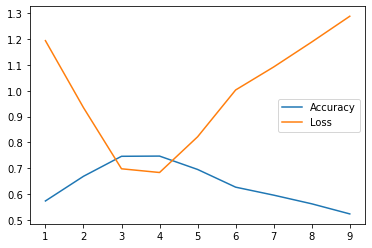

In [53]:
plt.plot(no_layers, accs, label='Accuracy')
plt.plot(no_layers, losses, label='Loss')
plt.legend()
plt.show()

### Change batch size

In [54]:
best_batch_size = batch_size[0]
best_loss = 5
best_acc = 0

losses = []
accs = []

for i in batch_size:
    print("Batch size:", i)
    model = Sequential()
    model.add(Dense(best_layer_size, activation=best_activation_function, input_dim=16*16*3))

    for j in range(1, best_no_of_layers):
        model.add(Dense(best_layers_size[j-1], activation=best_activation_function))

    model.add(Dense(no_labels, activation='softmax'))
    model.compile(optimizer=best_optimizer(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(learning_X, learning_Y, epochs=30, batch_size=i)

    accs.append(history.history['acc'][-1])
    losses.append(history.history['loss'][-1])

    if history.history['loss'][-1] <= best_loss and history.history['acc'][-1] >= best_acc:
        best_batch_size = i
        best_loss = history.history['loss'][-1]
        best_acc = history.history['acc'][-1]
    print("-----------------------------------------------------------")

Batch size: 32
Epoch 1/30
313/313 [==============================] - 3s 7ms/step - loss: 2.1184 - acc: 0.2083
Epoch 2/30
313/313 [==============================] - 2s 8ms/step - loss: 1.8799 - acc: 0.3111
Epoch 3/30
313/313 [==============================] - 2s 7ms/step - loss: 1.8066 - acc: 0.3399
Epoch 4/30
313/313 [==============================] - 2s 7ms/step - loss: 1.7496 - acc: 0.3684
Epoch 5/30
313/313 [==============================] - 2s 7ms/step - loss: 1.6845 - acc: 0.3901
Epoch 6/30
313/313 [==============================] - 2s 7ms/step - loss: 1.6478 - acc: 0.3988
Epoch 7/30
313/313 [==============================] - 2s 8ms/step - loss: 1.6054 - acc: 0.4139
Epoch 8/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5782 - acc: 0.4266
Epoch 9/30
313/313 [==============================] - 2s 7ms/step - loss: 1.5292 - acc: 0.4445
Epoch 10/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4816 - acc: 0.4534
Epoch 11/30
313/313 [=============

In [55]:
best_batch_size, best_loss, best_acc

(32, 0.6507737040519714, 0.7598000168800354)

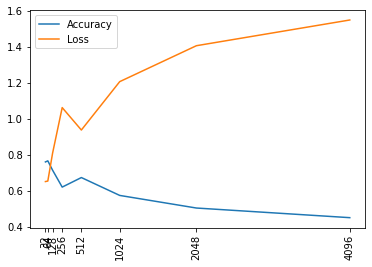

In [56]:
plt.plot(batch_size, accs, label='Accuracy')
plt.plot(batch_size, losses, label='Loss')
plt.legend()
plt.xticks(batch_size, rotation=90)
plt.show()

### Change number of epochs

In [58]:
best_no_epoch = no_epoch[0]
best_loss = 5
best_acc = 0
losses = []
accs = []
for i in no_epoch:
    print("Number of epochs:", i)
    model = Sequential()
    model.add(Dense(best_layer_size, activation=best_activation_function, input_dim=16*16*3))

    for j in range(1, best_no_of_layers):
        model.add(Dense(best_layers_size[j-1], activation=best_activation_function))

    model.add(Dense(no_labels, activation='softmax'))
    model.compile(optimizer=best_optimizer(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['acc'])
    history = model.fit(learning_X, learning_Y, batch_size=best_batch_size, epochs=i)
    
    accs.append(history.history['acc'][-1])
    losses.append(history.history['loss'][-1])

    if history.history['loss'][-1] <= best_loss and history.history['acc'][-1] >= best_acc:
        best_no_epoch = i
        best_loss = history.history['loss'][-1]
        best_acc = history.history['acc'][-1]
    print("-----------------------------------------------------------")

Number of epochs: 20
Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 2.1232 - acc: 0.2127
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.8822 - acc: 0.3107
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.8000 - acc: 0.3436
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7603 - acc: 0.3614
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6941 - acc: 0.3834
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6510 - acc: 0.4012
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6285 - acc: 0.4107
Epoch 8/20
313/313 [==============================] - 2s 7ms/step - loss: 1.5887 - acc: 0.4186
Epoch 9/20
313/313 [==============================] - 2s 7ms/step - loss: 1.5409 - acc: 0.4431
Epoch 10/20
313/313 [==============================] - 2s 7ms/step - loss: 1.4684 - acc: 0.4710
Epoch 11/20
313/313 [=======

In [59]:
best_no_epoch, best_loss, best_acc

(90, 0.05173463746905327, 0.9829000234603882)

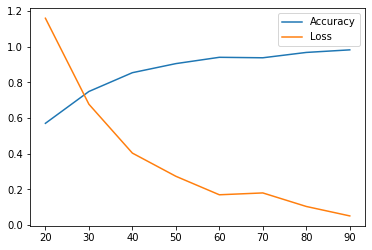

In [60]:
plt.plot(no_epoch, accs, label='Accuracy')
plt.plot(no_epoch, losses, label='Loss')
plt.xticks(no_epoch)
plt.legend()
plt.show()

## Trainging

In [64]:
model = Sequential()
model.add(Dense(best_layer_size, activation=best_activation_function, input_dim=16*16*3))
for j in range(1, best_no_of_layers):
    model.add(Dense(best_layers_size[j-1], activation=best_activation_function))
model.add(Dense(no_labels, activation='softmax'))
model.compile(optimizer=best_optimizer(learning_rate=best_learning_rate), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, batch_size=best_batch_size, epochs=best_no_epoch)

Epoch 1/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9569 - acc: 0.2777
Epoch 2/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6938 - acc: 0.3905
Epoch 3/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5991 - acc: 0.4246
Epoch 4/90
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5288 - acc: 0.4499
Epoch 5/90
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4858 - acc: 0.4673
Epoch 6/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4379 - acc: 0.4801
Epoch 7/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4032 - acc: 0.4972
Epoch 8/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3664 - acc: 0.5072
Epoch 9/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3384 - acc: 0.5151
Epoch 10/90
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3156 - acc: 0.5264
Epoch 11/90
1563/15

## Save model

In [65]:
model.save('MyModel')

INFO:tensorflow:Assets written to: MyModel/assets


## Load model

In [ ]:
from tensorflow import keras
model = keras.models.load_model('MyModel')

## Evaluate

In [66]:
loss, acc = model.evaluate(X_train, Y_train)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.3309 - acc: 0.8849


In [67]:
loss, acc = model.evaluate(X_test, Y_test)
y_pred_probs = model.predict(X_test)
y_pred = model.predict_classes(X_test)

313/313 [==============================] - 1s 2ms/step - loss: 4.2827 - acc: 0.4706


It seems data have been overfitted(because of the differences in accuracy printed above), but the accuracy of test is not too bad compared to others. We can avoid overfitting by data augmentation, like fliping, or using Dropout layer in our model.

I assume my model is not bad(The others were less than 60) because most of the features have been checked and the best one has been chosen. By using convolutional layers and dropout, the result will be much better. If I had flipped the data, test accuracy could have been more.

### Confusion matrix

In [74]:
from sklearn.metrics import confusion_matrix

In [70]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[527  31  60  33  58  39  19  32 160  41]
 [ 49 535  14  37  19  31  21  24  77 193]
 [ 75  14 352  98 152 119  83  68  20  19]
 [ 28  18  92 339  58 220 121  51  25  48]
 [ 40   6 155  81 390  77  97 105  35  14]
 [ 31  14  89 218  69 412  57  73  22  15]
 [ 16  15 104 116 113  90 479  37  11  19]
 [ 42  15  66  75  86 100  27 529  25  35]
 [ 85  54  23  32  36  22  21  21 645  61]
 [ 50 149  20  52  21  32  29  53  96 498]]


### Accuracy, Precision, Recall, F1Score

In [71]:
tp = [0] * no_labels
fp = [0] * no_labels
fn = [0] * no_labels
tn = [0] * no_labels

accuracy = []
precision = []
recall = []
f1_score = []

total_sum = sum(sum(conf_matrix))

for i in range(no_labels):
    tp[i] = conf_matrix[i][i]
    fp[i] = sum(conf_matrix[:, i]) - tp[i]
    fn[i] = sum(conf_matrix[i, :]) - tp[i]
    tn[i] = total_sum - tp[i] - fp[i] - fn[i]

    accuracy.append((tp[i] + tn[i]) / (tp[i] + tn[i] + fp[i] + fn[i]))
    precision.append((tp[i]) / (tp[i]+ fp[i]))
    recall.append((tp[i]) / (tp[i] + fn[i]))
    f1_score.append((2 * precision[i] * recall[i]) / (precision[i] + recall[i]))

In [72]:
import pandas as pd
info = pd.DataFrame(list(zip(accuracy, precision, recall, f1_score)), columns=['Accuracy', 'Precision', 'Recall', 'F1Score'])

In [73]:
info

,Accuracy,Precision,Recall,F1Score
0,0.9111,0.558855,0.527,0.542460
1,0.9219,0.628672,0.535,0.578066
2,0.8729,0.361026,0.352,0.356456
3,0.8597,0.313599,0.339,0.325805
4,0.8778,0.389222,0.390,0.389610
5,0.8682,0.360771,0.412,0.384687
6,0.9004,0.502096,0.479,0.490276
7,0.9065,0.532729,0.529,0.530858
8,0.9174,0.577957,0.645,0.609641
9,0.9053,0.528102,0.498,0.512609
